# MadGraph 

In [24]:
import pandas as pd
import numpy as np
import subprocess
import time

from scipy import interpolate

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 

In [3]:
#good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

# $p\,p\to \chi^+\chi^-$

NOTA: the file mg5_configuration.txt tiene desabilitada la opcion del Browser

In [27]:
'''
#!/usr/bin/env python

#Import run_dicctionary.py
#This file run a lot of dicctionaryes to run SPheno

import pyslha
import pandas as pd
import numpy as np
import subprocess
import time
import sys

x=[]

for i in range(0,10):

    mcha = 100.01+(100.*i)
    #myfile5 is located in madgraph directory and contains the process to be launched and 
    #the parameters to be changed in the param_card
    f1 = open('/home/anferivera/Work/MG5_aMC_v2_5_5/myfile5', "w")
    f1.write(str("launch SDdiracDMXXb") + '\n' + str("set mcha") + '\t' + str(mcha) + '\n' )
    f1.close()

    #Run MadGraph
    cr = subprocess.getoutput('~/Work/MG5_aMC_v2_5_5/./bin/mg5_aMC ~/Work/MG5_aMC_v2_5_5/myfile5')
    cross = eval(cr.split('Cross-section :   ')[1].split('+-')[0])
    print(cross)

    x.append([mcha,cross])
    
x=np.asarray(x)
xd=pd.DataFrame(x,columns=['mcha','cross'])

xd.to_csv('xd_madgrph_XXbar.csv')
'''

2.326
0.1894
0.03977
0.01212
0.004531
0.001929
0.0008968
0.0004443
0.0002318
0.0001256


### Read Output generated in MadGraph

In [27]:
xd=pd.read_csv('xd_madgrph_XXbar.csv')

CSM=interpolate.interp1d(xd.mcha, xd.cross)

### Resummino code

https://twiki.cern.ch/twiki/bin/view/LHCPhysics/SUSYCrossSections13TeVx1x1hino

In [26]:
xd.columns

Index(['Unnamed: 0', 'mcha', 'cross'], dtype='object')

In [28]:
#twiki values for chargino production in fb

names1 = ['m', 'cs', 'unc']
a = np.loadtxt('hino.dat')
yd = pd.DataFrame(a, columns=names1)

CS=interpolate.interp1d(yd.m,yd.cs)

In [13]:
CS(1000)

array(0.182305)

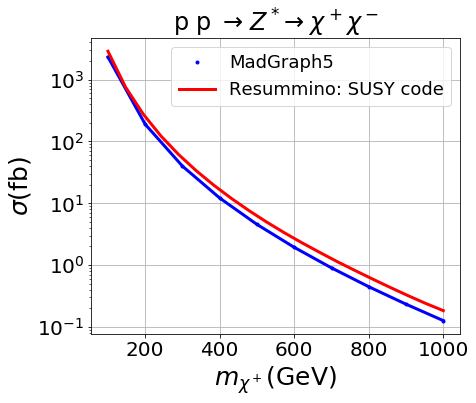

In [46]:
plt.figure(figsize=(7,6))

plt.semilogy(xd.mcha,xd.cross*1e3,'b.',label=r'MadGraph5')
plt.semilogy(xd.mcha,xd.cross*1e3,'b-', lw=3, label='')

n = np.linspace(1e2,1e3, 20)
plt.plot(n,CS(n),'r-', lw=3,label='Resummino: SUSY code')

#m = np.linspace(2e2,1e3, 100)
#plt.plot(m,CSM(m)*1e3,'g-', lw=3,label='MadGraph')

plt.title(r'p p $\,\to\; Z^*\to\; \chi^+\chi^-$')
plt.legend(prop={'size':18},loc='best')
plt.xlabel(r'$m_{\chi^+}$(GeV)',size=25)
plt.ylabel(r'$\sigma$(fb)',size=25)
plt.grid()

plt.tight_layout()
plt.savefig('plots/sigma_pp_xx_MadGraph.pdf')

### Search for electroweak production of charginos and sleptons decaying in final states with two leptons and missing transverse momentum in √s = 13 TeV p p collisions using the ATLAS detector

http://inspirehep.net/record/1726185/files/ATLAS-CONF-2019-008.pdf

https://arxiv.org/pdf/1807.07799.pdf